In [0]:
import numpy as np

import pandas as pd

import seaborn as sns
# importing ploting libraries
import matplotlib.pyplot as plt   

plt.rcParams['figure.figsize'] = (16, 9)

plt.style.use('ggplot')

from sklearn import metrics

In [0]:
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans




In [0]:
%matplotlib inline 

In [24]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [25]:
cars_df = pd.read_csv("/content/drive/My Drive/GreatlakesAIML/cars-dataset.csv")
print("Input Data and Shape")

print(cars_df.shape)

cars_df.head()

Input Data and Shape
(398, 8)


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


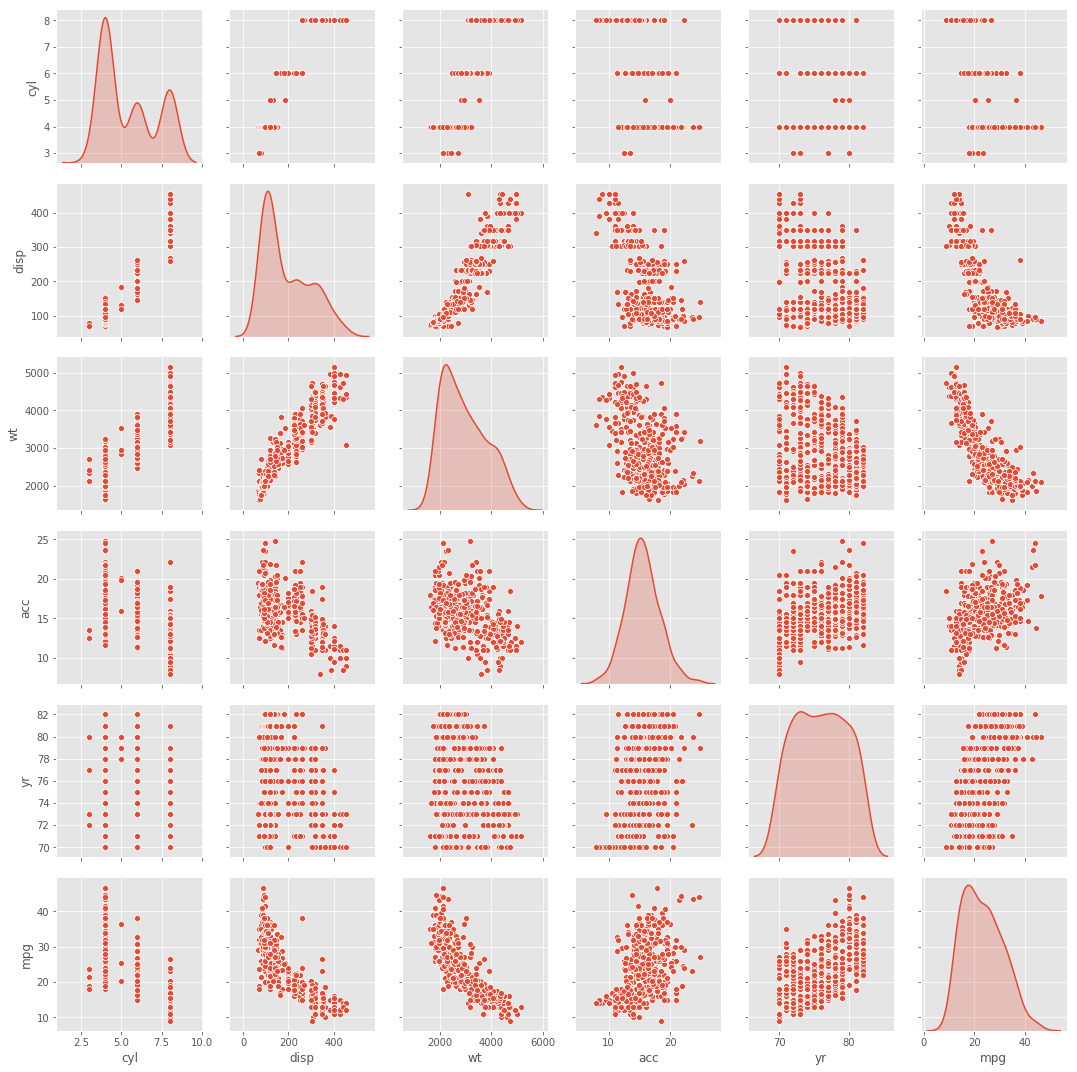

In [26]:
sns.pairplot(cars_df, diag_kind ='kde') # Posibility of 3 clusters from cyl scatter diagram shown 3 Gaussian peaks

In [27]:
cars_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [28]:
temp = pd.DataFrame(cars_df.hp.str.isdigit()) 

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [29]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [0]:
cars_df = cars_df.replace('?', np.nan)

In [31]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [0]:
cars_df['hp'] = cars_df['hp'].astype('float64')

In [33]:
numeric_cols = cars_df.drop('car name', axis=1)

car_names = pd.DataFrame(cars_df[['car name']])


numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0)
cars_df = numeric_cols.join(car_names)   

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


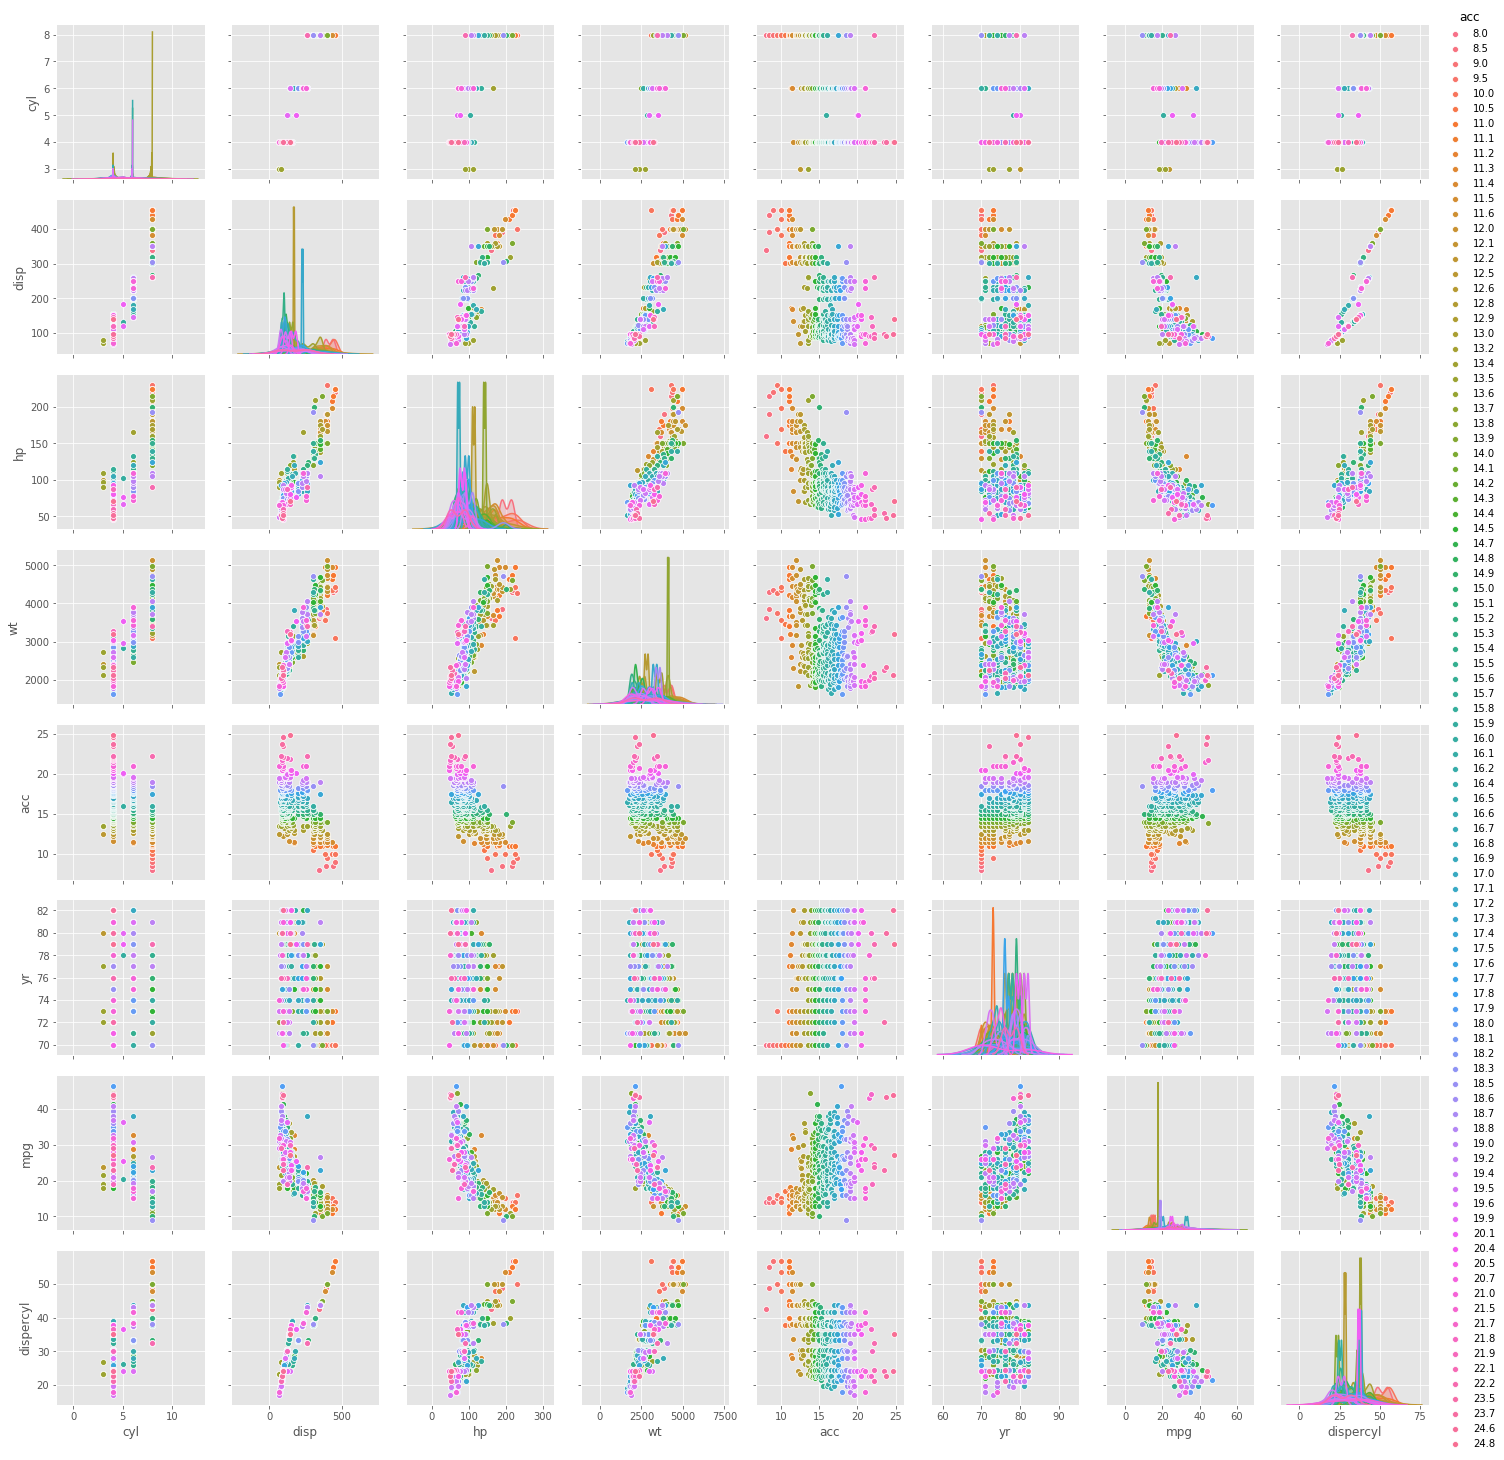

In [34]:
cars_df_attr = cars_df.iloc[:, 0:7]
cars_df_attr['dispercyl'] = cars_df_attr['disp'] / cars_df_attr['cyl']
sns.pairplot(cars_df_attr, diag_kind='kde', hue = 'acc')
# We seem to be having 3 hidden clusters based on Gaussian distribution

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


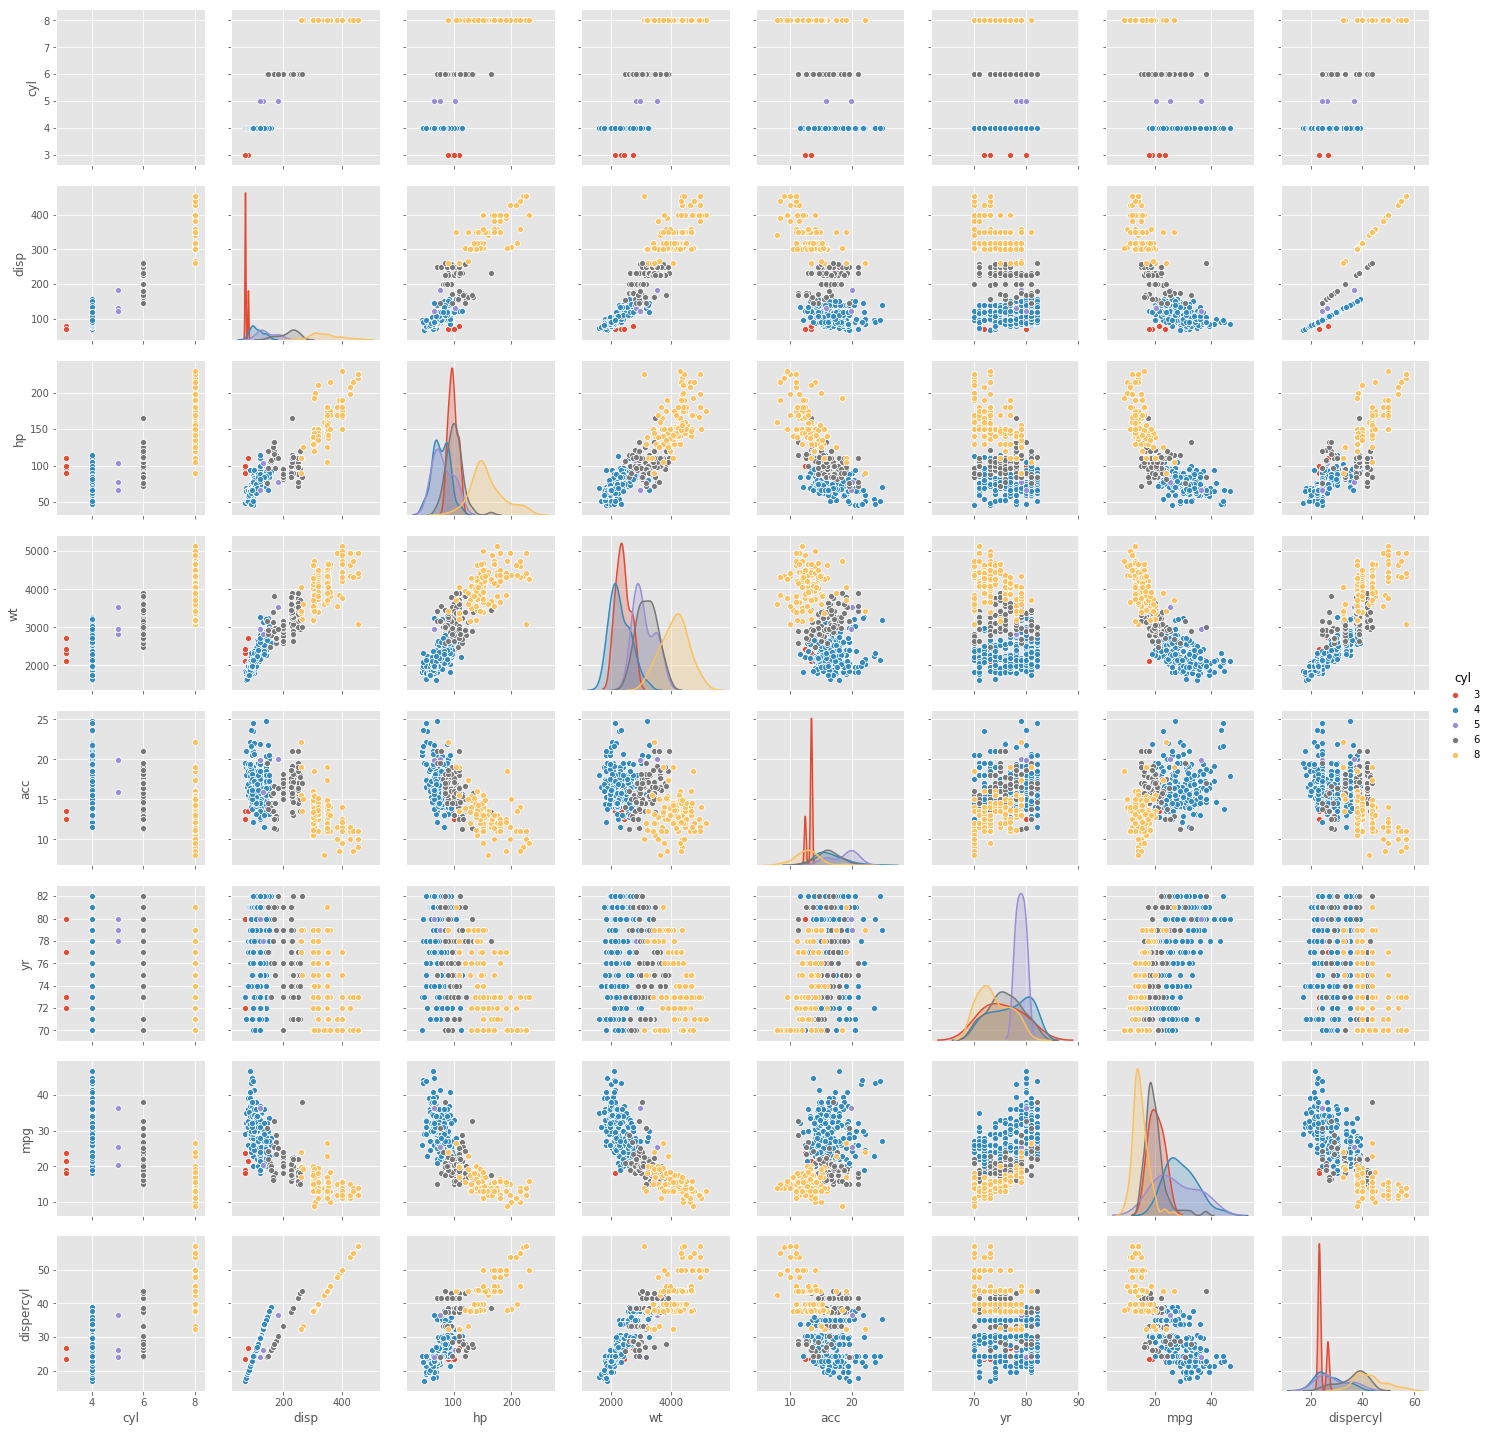

In [35]:
sns.pairplot(cars_df_attr, diag_kind='kde', hue = 'cyl')  # HP, Weight, acc show 4 to 5 hidden clusters
# weight , HP and displacement are positively correalted with each other. 
#accelearation & HP seems to be negatively correlated. 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


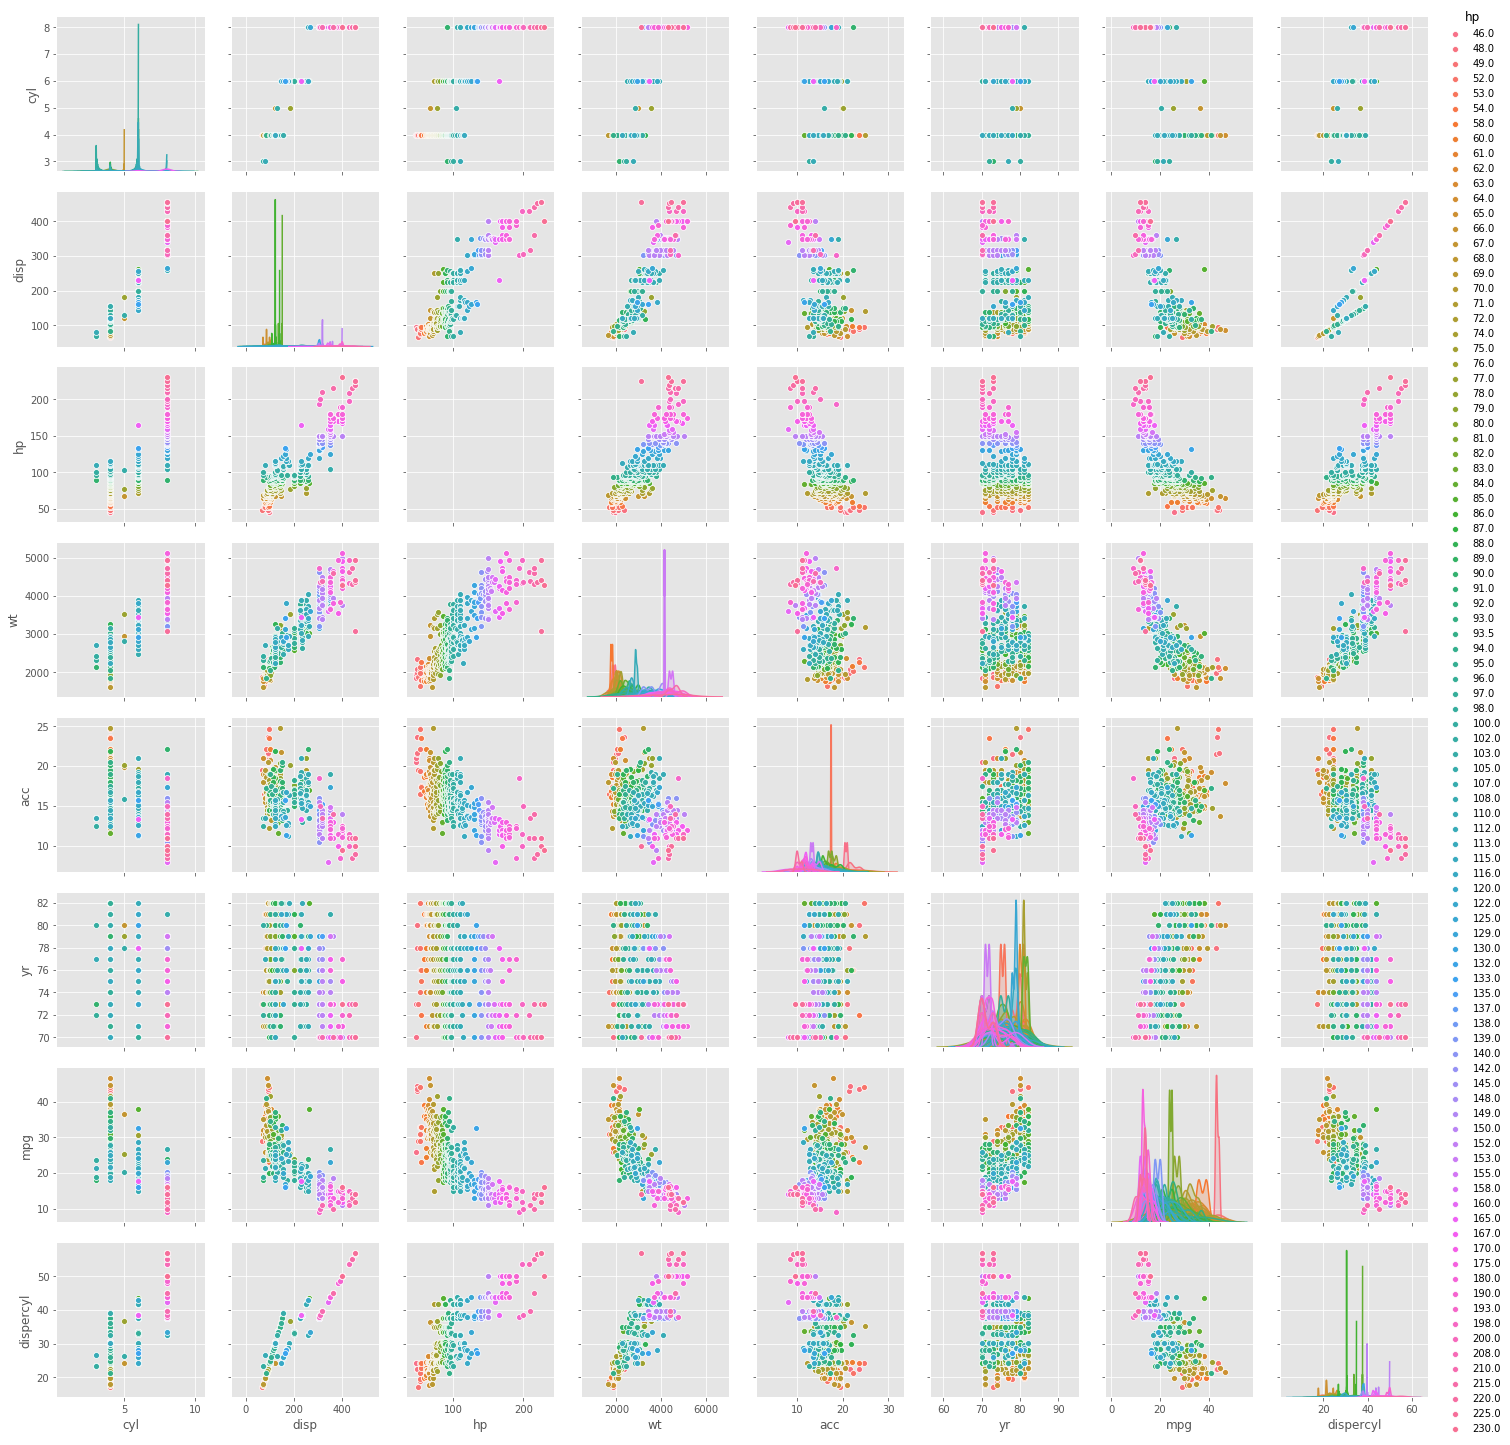

In [36]:
sns.pairplot(cars_df_attr, diag_kind='kde', hue = 'hp')

In [37]:
from scipy.stats import zscore

cars_df_attr = cars_df.loc[:, 'cyl':'mpg']
cars_df_attr


,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
9,8,390.0,190.0,3850,8.5,70,15.0


In [0]:
cars_df_attr_z = cars_df_attr.apply(zscore)
     # Remove  "yr" columns
cars_df_attr_z.pop('yr')
array = cars_df_attr_z.values

## **KMeans Clustering**

In [39]:
cluster_range = range( 2, 8)   # expect 4 to 5 clusters from the pair panel visual inspection hence restricting from 2 to 8
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  cluster_sil_scores.append(metrics.silhouette_score(cars_df_attr_z, labels, metric='euclidean'))
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors,"Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,7.428941e+07,0.467390
1,3,3.420799e+07,0.335123
2,4,1.905671e+07,0.195269
3,5,1.376961e+07,0.153402
4,6,1.032286e+07,0.101892
5,7,7.662720e+06,0.055841


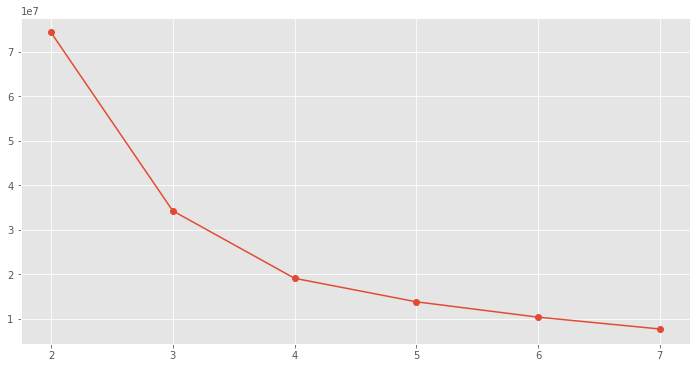

In [40]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [0]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(cars_df_attr_z)
cars_df_attr_z_copy = cars_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [42]:
centroids = cluster.cluster_centers_
centroids #below there are 6 numbers and the point out the Centroid in 6 dimensions. 

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [43]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_attr_z) )
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [0]:
prediction=cluster.predict(cars_df_attr_z)
cars_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effafbf0128>,
      dtype=object)

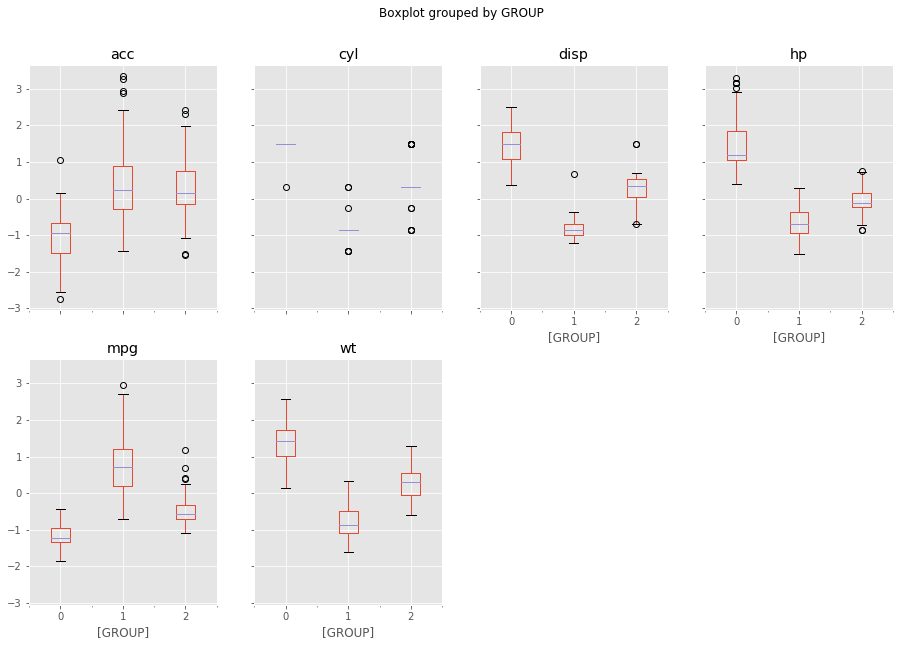

In [45]:
import matplotlib.pylab as plt

cars_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

# There are many outliers on each dimension   Spread of data on each dimension is long due to the outliers). # If the outliers are  addressed in acc, the clusters will overlap much less than right now (except in wt dimension which has no outlier)


In [46]:
data = cars_df_attr_z   
       
def replace(group):
    median, std = group.median(), group.std() 
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_attr_z['GROUP']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effb13b7a90>,
      dtype=object)

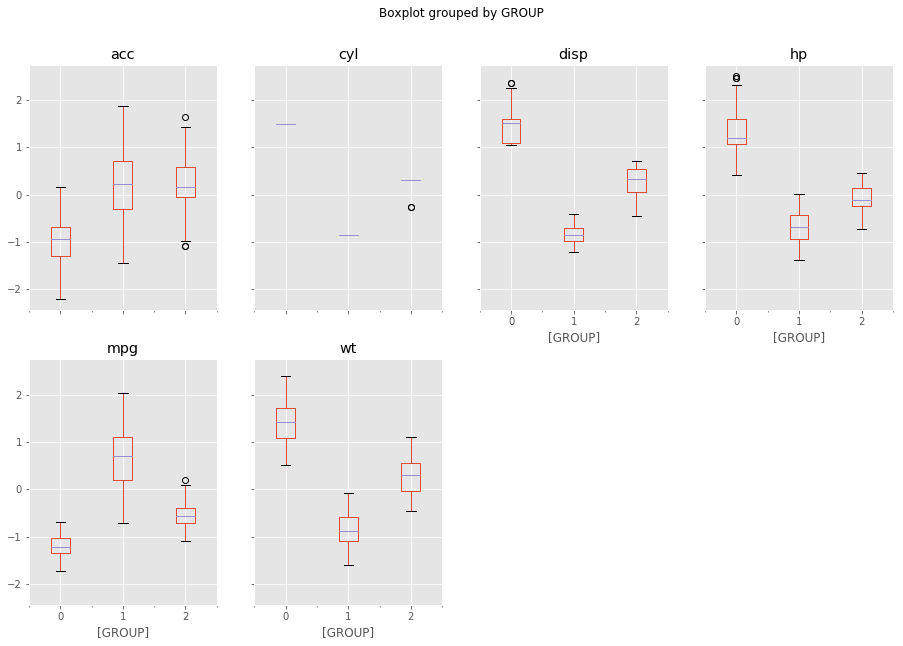

In [47]:
concat_data.boxplot(by = 'GROUP', layout=(2,4), figsize=(15, 10))

The new outliers would be much closer to the centre

In [51]:
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,car name
0,8,307.0,130.0,3504,12.0,70,18.0,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,15.0,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,18.0,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,16.0,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,17.0,ford torino


In [52]:
from scipy.stats import zscore
cars_df_attr = cars_df.loc[:, 'cyl':'mpg']
cars_df_attr



,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
9,8,390.0,190.0,3850,8.5,70,15.0


In [0]:
cars_df_attr_z = cars_df_attr.apply(zscore)
     # Remove  "yr" columns
cars_df_attr_z.pop('yr')
array = cars_df_attr_z.values

In [0]:
X = array[:,0:4] 
y = array[:,5]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
from sklearn.linear_model import LinearRegression

In [57]:
regression_model = LinearRegression()

regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6869361086963128
0.7497943001341986
